In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

In [2]:
rcParams['figure.figsize'] = 8, 5
sns.set_style('darkgrid')

In [3]:
cars_df = pd.read_csv('car_data.csv')
cars_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
cars_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
cars_df.info()
#there are no missing values since out of 205 entries, each feature has 205 non-null values. such a complete data!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
cars_df['car_company'] = cars_df['CarName'].apply(lambda car: car.split()[0].lower())
print("The unique companies in our data set are:")
cars_df['car_company'].unique()

The unique companies in our data set are:


array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [7]:
typo = {'maxda':'mazda','porcshce':'porsche','toyouta':'toyota','vokswagen':'volkswagen','vw':'volkswagen'}
cars_df['car_company'] = cars_df['car_company'].replace(typo)
print("The unique companies in our data set are:")
cars_df['car_company'].unique()

The unique companies in our data set are:


array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

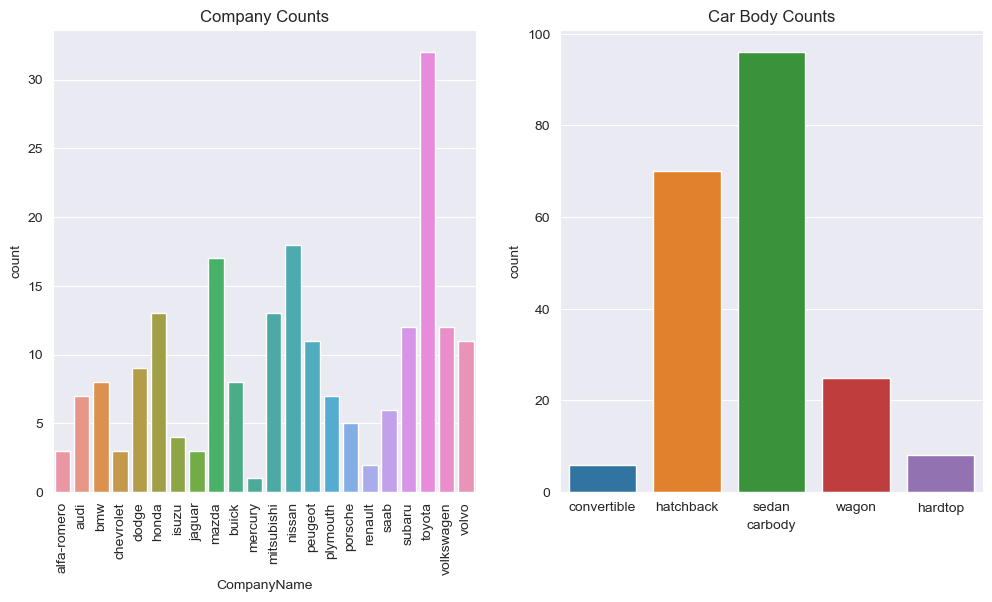

In [8]:
unique = cars_df['car_company'].value_counts().index
counts = cars_df['car_company'].value_counts().values
carbody = cars_df['carbody'].value_counts().index
counts_body = cars_df['carbody'].value_counts().values

colors = ['blue','orange','green','red','lilac']

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
sns.countplot(x=cars_df['car_company'], ax=axes[0])
axes[0].set_title('Company Counts')
axes[0].set_xticklabels(cars_df['car_company'].unique(),rotation=90)
axes[0].set_xlabel('CompanyName')
axes[0].set_ylabel('count')

sns.countplot(x=cars_df['carbody'], ax=axes[1])
axes[1].set_title("Car Body Counts")
axes[1].set_ylabel('count')


plt.show()
#we can clearly see that majority of the cars are toyota, followed by nissan and mazda. also majority of the cars
#are sedan and hatchback.

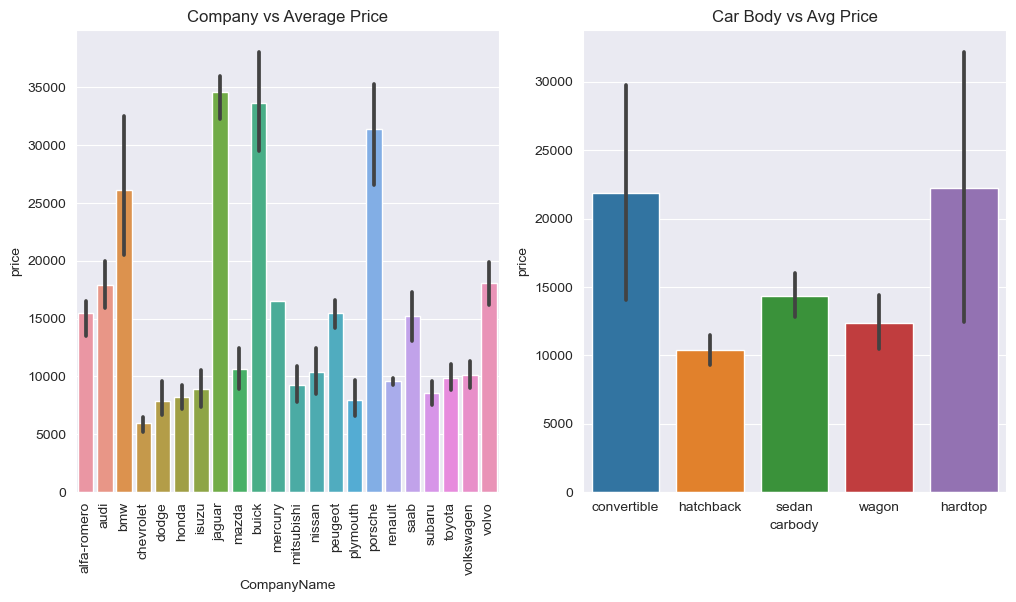

In [9]:
unique = cars_df['car_company'].value_counts().index
counts = cars_df['car_company'].value_counts().values
carbody = cars_df['carbody'].value_counts().index
counts_body = cars_df['carbody'].value_counts().values


fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(12,6))

sns.barplot(x=cars_df['car_company'], y=cars_df['price'], ax=axes[0])

axes[0].set_title('Company vs Average Price')
axes[0].set_xticklabels(cars_df['car_company'].unique(),rotation=90)
axes[0].set_xlabel('CompanyName')
axes[0].set_ylabel('price')

sns.barplot(x=cars_df['carbody'], y=cars_df['price'], ax=axes[1])
axes[1].set_title("Car Body vs Avg Price")



plt.show()

#we can clearly see that jaguar, buick and porche make cars and convertible and hardtop cars have higher avg price.

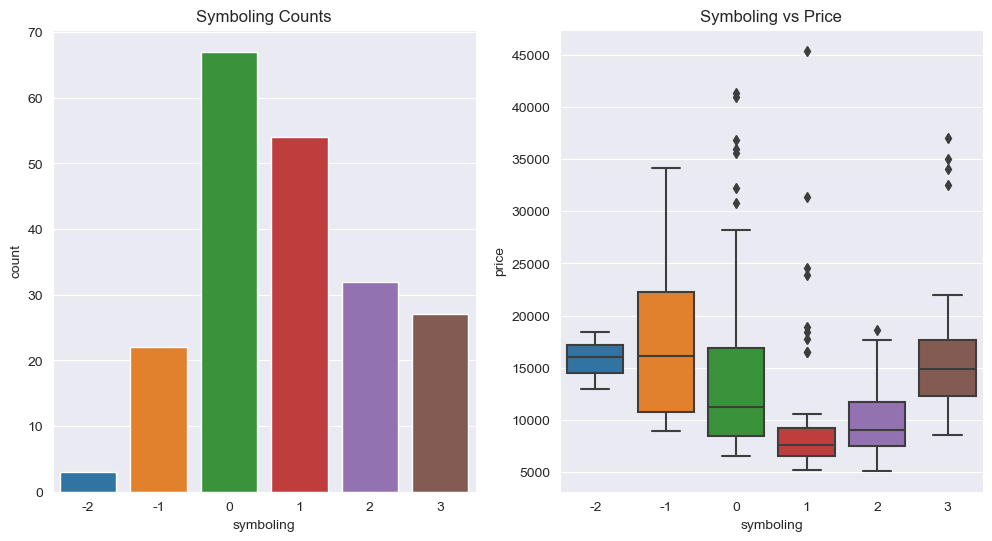

In [10]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
sns.countplot(x=cars_df['symboling'], ax=axes[0])
axes[0].set_title('Symboling Counts')
axes[0].set_xlabel('symboling')
axes[0].set_ylabel('count')

sns.boxplot(x='symboling',y='price',data=cars_df, ax=axes[1])
axes[1].set_title("Symboling vs Price")
axes[1].set_ylabel('price')
axes[1].set_xlabel('symboling')

plt.show()

#we can see which symboling is more frequent and which is the most expensive (and cheap). 0 is most frequent,
#and -1 has the highest price.

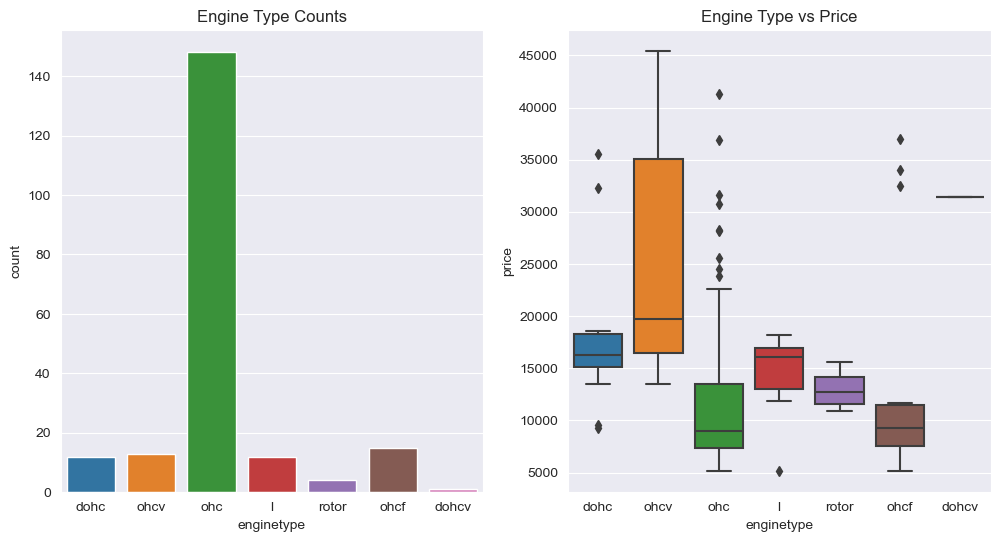

In [11]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
sns.countplot(x=cars_df['enginetype'], ax=axes[0])
axes[0].set_title('Engine Type Counts')
axes[0].set_xlabel('enginetype')
axes[0].set_ylabel('count')

sns.boxplot(x='enginetype',y='price',data=cars_df, ax=axes[1])
axes[1].set_title("Engine Type vs Price")
axes[1].set_ylabel('price')
axes[1].set_xlabel('enginetype')

plt.show()

#ohc enginetype is most frequent, and ohcv is the most expensive.

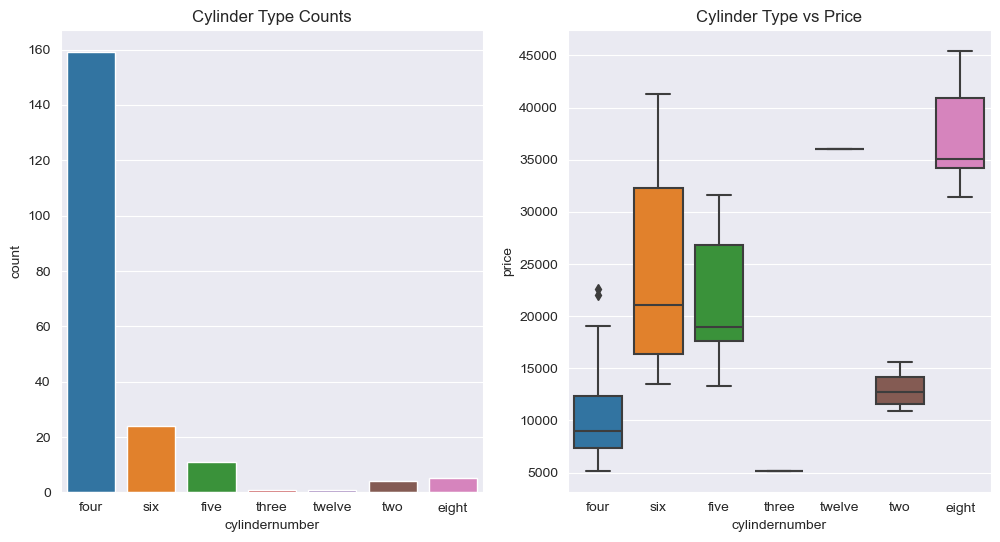

In [12]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
sns.countplot(x=cars_df['cylindernumber'], ax=axes[0])
axes[0].set_title('Cylinder Type Counts')
axes[0].set_xlabel('cylindernumber')
axes[0].set_ylabel('count')

sns.boxplot(x='cylindernumber',y='price',data=cars_df, ax=axes[1])
axes[1].set_title("Cylinder Type vs Price")
axes[1].set_ylabel('price')
axes[1].set_xlabel('cylindernumber')

plt.show()

#most frequent cylindernumber is four, and the most expensive is eight

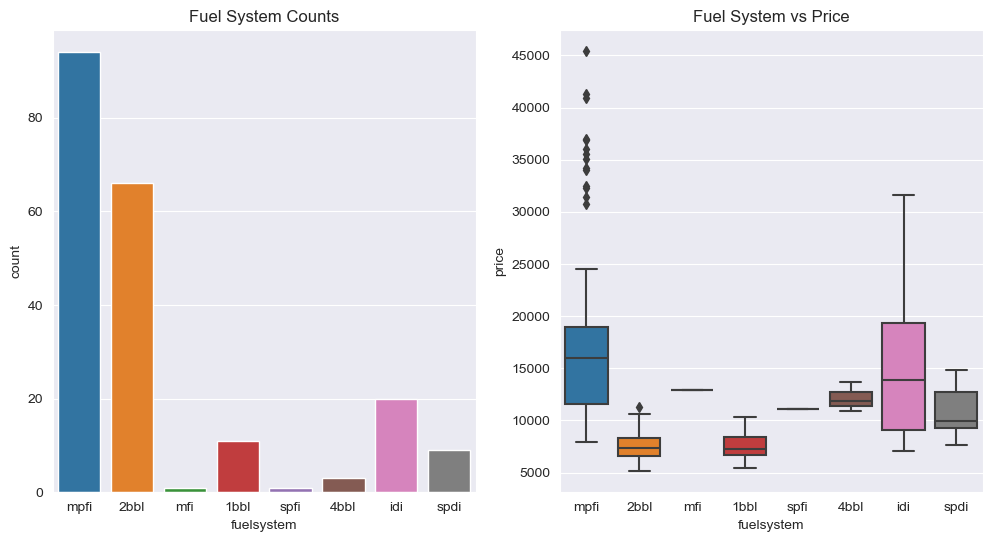

In [13]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
sns.countplot(x=cars_df['fuelsystem'], ax=axes[0])
axes[0].set_title('Fuel System Counts')
axes[0].set_xlabel('fuelsystem')
axes[0].set_ylabel('count')

sns.boxplot(x='fuelsystem',y='price',data=cars_df, ax=axes[1])
axes[1].set_title("Fuel System vs Price")
axes[1].set_ylabel('price')
axes[1].set_xlabel('fuelsystem')

plt.show()

#most frequent fuel systems are mpfi and 2bbl, and the most expensive is idi. also mpfi seems to have many outliers.

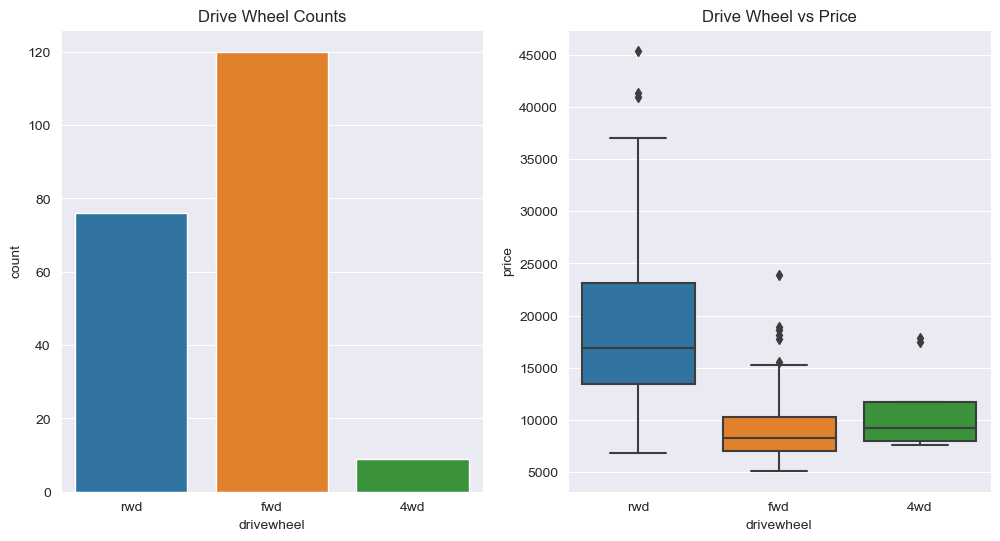

In [14]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
sns.countplot(x=cars_df['drivewheel'], ax=axes[0])
axes[0].set_title('Drive Wheel Counts')
axes[0].set_xlabel('drivewheel')
axes[0].set_ylabel('count')

sns.boxplot(x='drivewheel',y='price',data=cars_df, ax=axes[1])
axes[1].set_title("Drive Wheel vs Price")
axes[1].set_ylabel('price')
axes[1].set_xlabel('drivewheel')

plt.show()

#fwd drivewheel is most frequent and rwd is most expensive.

Text(0.5, 0, 'enginelocatioin')

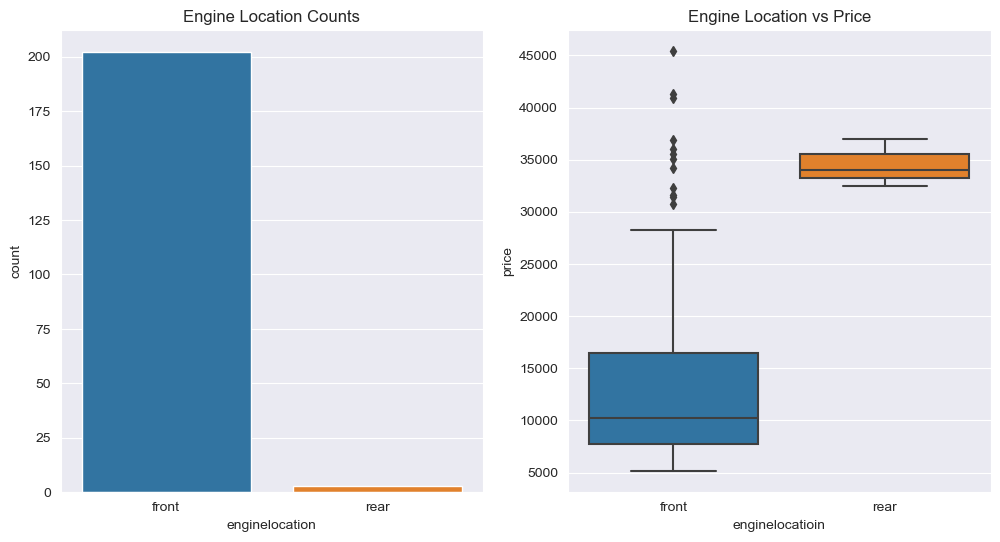

In [15]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
sns.countplot(x=cars_df['enginelocation'], ax=axes[0])
axes[0].set_title('Engine Location Counts')
axes[0].set_xlabel('enginelocation')
axes[0].set_ylabel('count')

sns.boxplot(x='enginelocation',y='price',data=cars_df, ax=axes[1])
axes[1].set_title("Engine Location vs Price")
axes[1].set_ylabel('price')
axes[1].set_xlabel('enginelocatioin')

#fwd enginelocation is way more frequent than rear, and rear is more expensive.

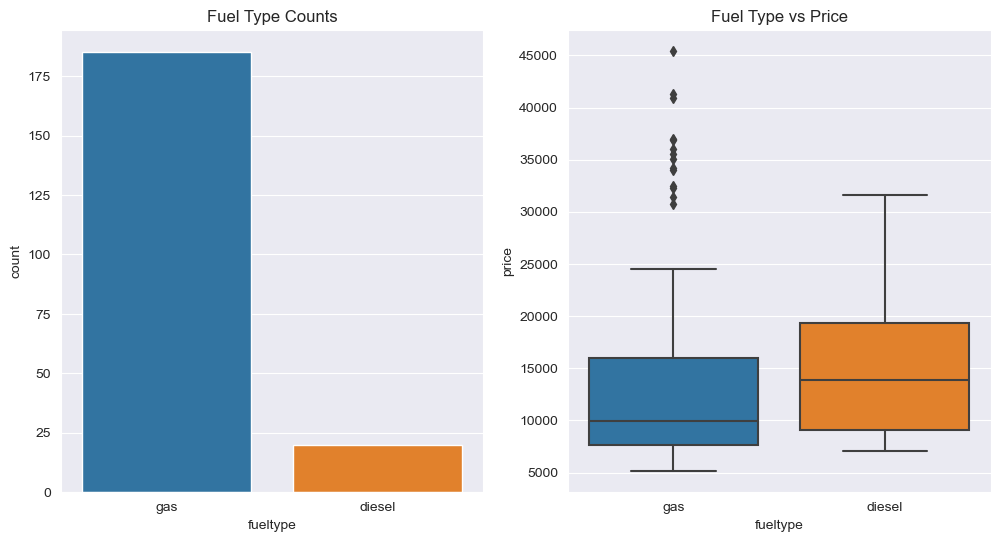

In [16]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
sns.countplot(x=cars_df['fueltype'], ax=axes[0])
axes[0].set_title('Fuel Type Counts')
axes[0].set_xlabel('fueltype')
axes[0].set_ylabel('count')

sns.boxplot(x='fueltype',y='price',data=cars_df, ax=axes[1])
axes[1].set_title("Fuel Type vs Price")
axes[1].set_ylabel('price')
axes[1].set_xlabel('fueltype')

plt.show()

#gas is more frequent and diesel is more expensive.

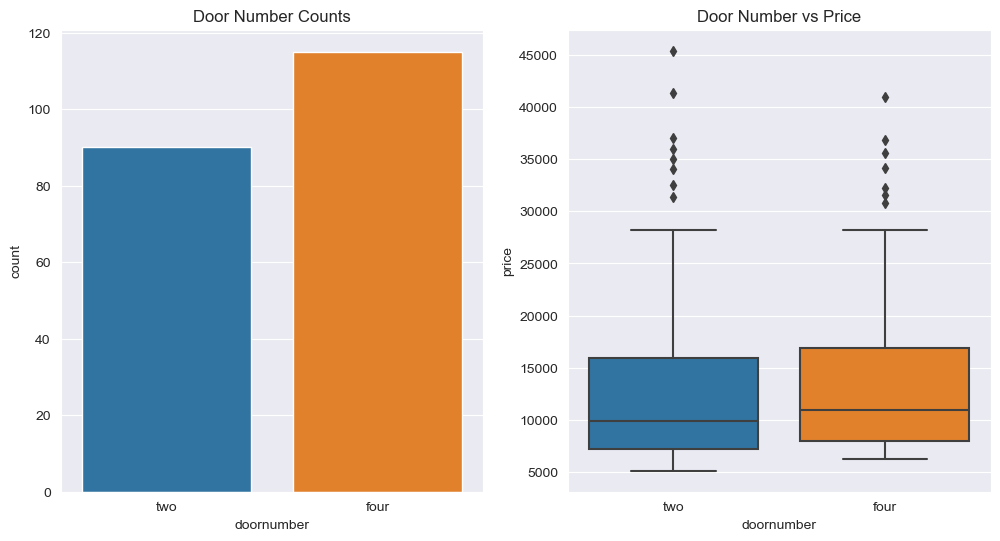

In [17]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
sns.countplot(x=cars_df['doornumber'], ax=axes[0])
axes[0].set_title('Door Number Counts')
axes[0].set_xlabel('doornumber')
axes[0].set_ylabel('count')

sns.boxplot(x='doornumber',y='price',data=cars_df, ax=axes[1])
axes[1].set_title("Door Number vs Price")
axes[1].set_ylabel('price')
axes[1].set_xlabel('doornumber')

plt.show()

#four is more frequent and both have almost simialr prices.

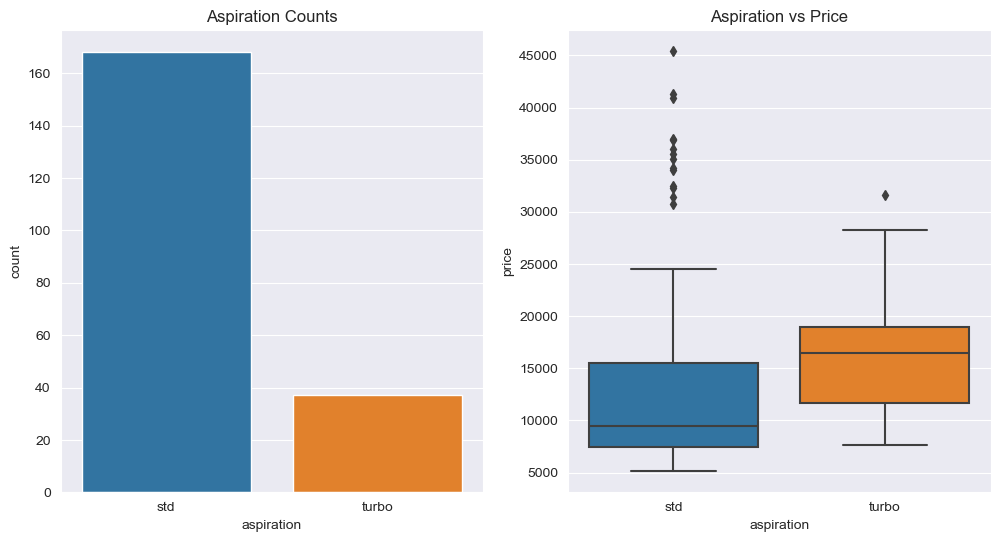

In [18]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
sns.countplot(x=cars_df['aspiration'], ax=axes[0])
axes[0].set_title('Aspiration Counts')
axes[0].set_xlabel('aspiration')
axes[0].set_ylabel('count')

sns.boxplot(x='aspiration',y='price',data=cars_df, ax=axes[1])
axes[1].set_title("Aspiration vs Price")
axes[1].set_ylabel('price')
axes[1].set_xlabel('aspiration')

plt.show()

#std is more frequent and turbo is more expensive.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


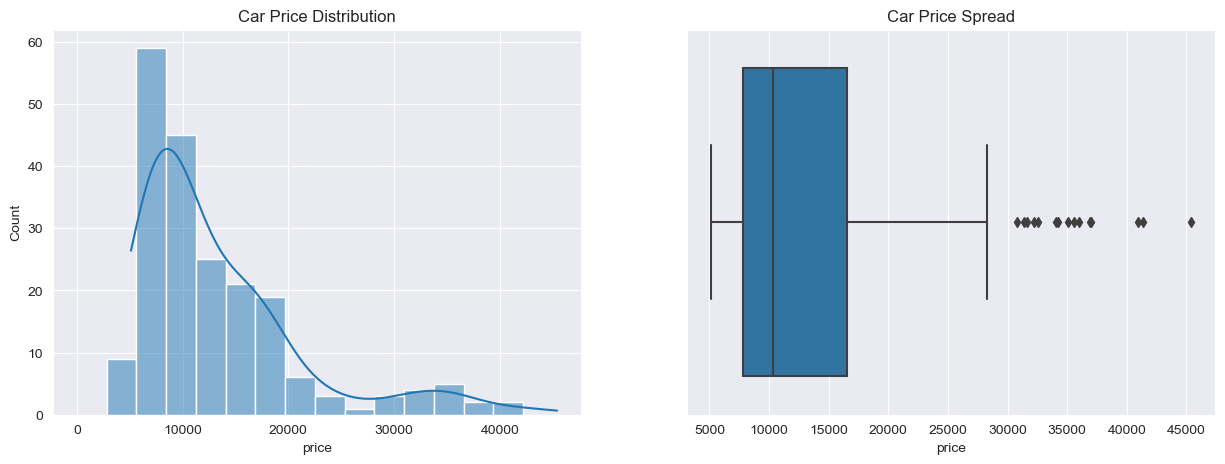

In [19]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
sns.histplot(x='price',data=cars_df,ax=axes[0],kde=True,binrange=(0,45000))
axes[0].set_title('Car Price Distribution')
axes[0].set_xlabel('price')
             
sns.boxplot(x='price', data=cars_df, ax=axes[1])
axes[1].set_title("Car Price Spread")
axes[1].set_xlabel('price')

plt.show()


#the car prices ranges between ~$7000 and ~$42000, and the average of the prices is ~$10,000.

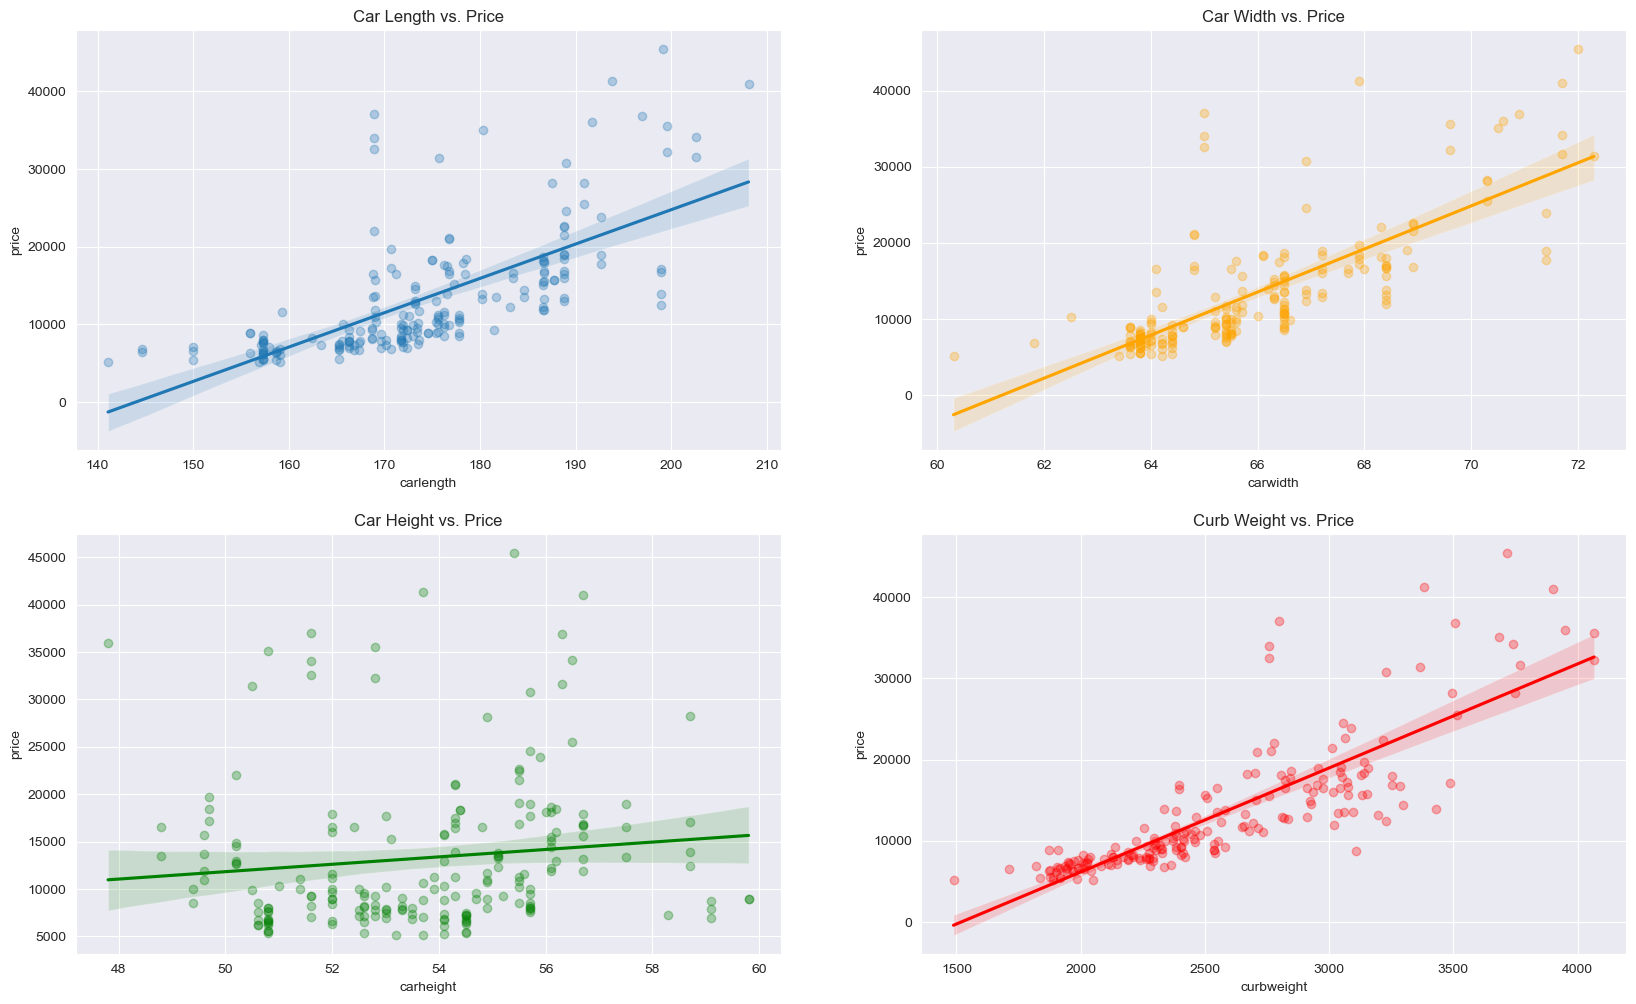

In [22]:
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(20,12))
sns.regplot(data=cars_df, x='carlength',y='price',scatter_kws={"alpha": 0.3},ax=axes[0][0])
axes[0][0].set_title('Car Length vs. Price')
sns.regplot(data=cars_df, x='carwidth',y='price',color='orange',scatter_kws={"alpha": 0.3}, ax=axes[0][1])
axes[0][1].set_title('Car Width vs. Price')
sns.regplot(data=cars_df, x='carheight',y='price',color='green',scatter_kws={"alpha": 0.3},ax=axes[1][0])
axes[1][0].set_title('Car Height vs. Price')
sns.regplot(data=cars_df, x='curbweight',y='price',color='red',scatter_kws={"alpha": 0.3},ax=axes[1][1])
axes[1][1].set_title('Curb Weight vs. Price')

plt.show()

#overall, there is a positive, linear relationship between the car length,width,and height and curb weight of the cars.


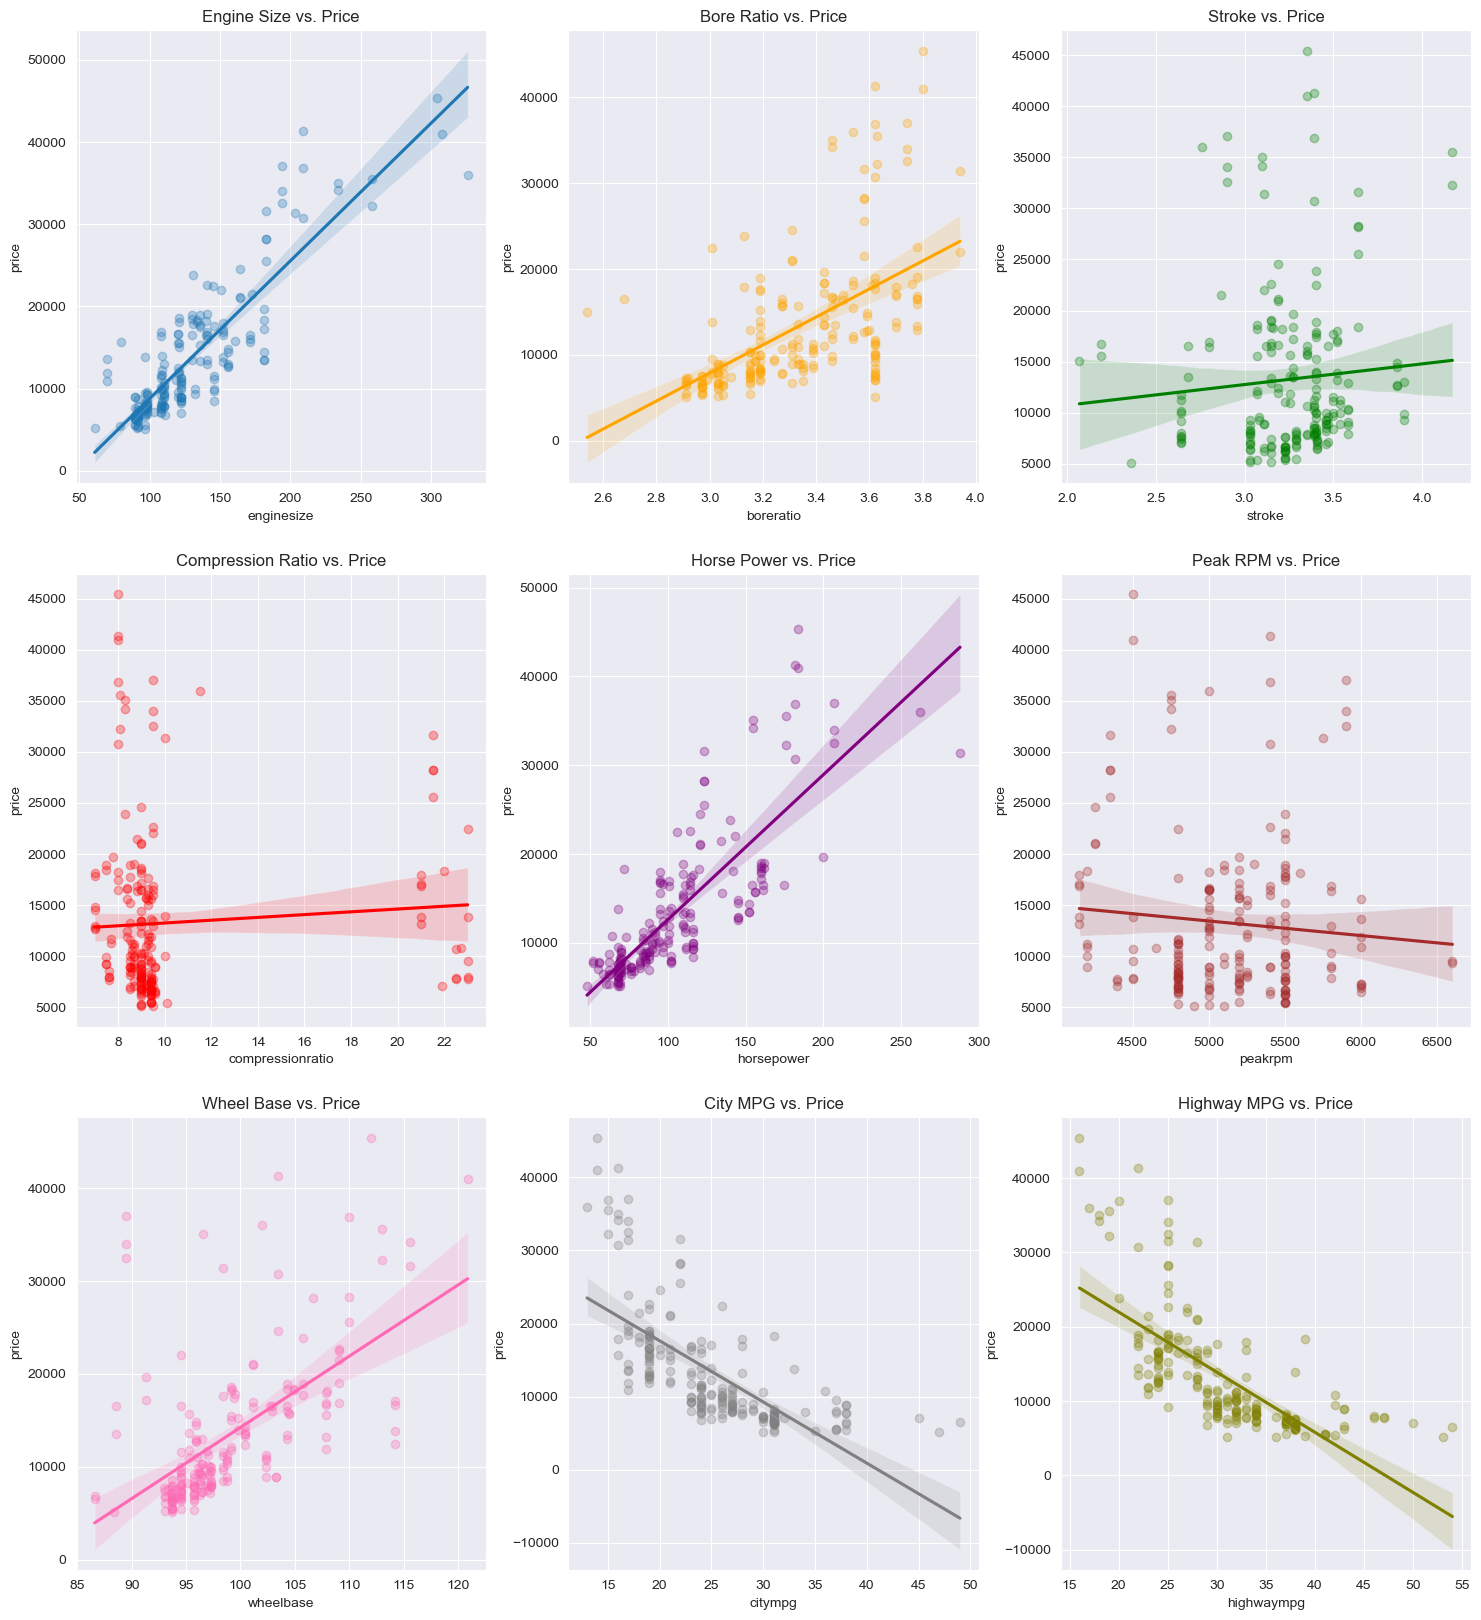

In [23]:
fig, axes = plt.subplots(nrows=3,ncols=3,figsize=(18,20))
sns.regplot(data=cars_df, x='enginesize',y='price',scatter_kws={"alpha": 0.3},ax=axes[0][0])
axes[0][0].set_title('Engine Size vs. Price')

sns.regplot(data=cars_df, x='boreratio',y='price',color='orange',scatter_kws={"alpha": 0.3},ax=axes[0][1])
axes[0][1].set_title('Bore Ratio vs. Price')

sns.regplot(data=cars_df, x='stroke',y='price',color='green',scatter_kws={"alpha": 0.3},ax=axes[0][2])
axes[0][2].set_title('Stroke vs. Price')

sns.regplot(data=cars_df, x='compressionratio',y='price',color='red',scatter_kws={"alpha": 0.3},ax=axes[1][0])
axes[1][0].set_title('Compression Ratio vs. Price')

sns.regplot(data=cars_df, x='horsepower',y='price',color='purple',scatter_kws={"alpha": 0.3},ax=axes[1][1])
axes[1][1].set_title('Horse Power vs. Price')

sns.regplot(data=cars_df, x='peakrpm',y='price',color='brown',scatter_kws={"alpha": 0.3},ax=axes[1][2])
axes[1][2].set_title('Peak RPM vs. Price')

sns.regplot(data=cars_df, x='wheelbase',y='price',color='hotpink',scatter_kws={"alpha": 0.3},ax=axes[2][0])
axes[2][0].set_title('Wheel Base vs. Price')

sns.regplot(data=cars_df, x='citympg',y='price',color='gray',scatter_kws={"alpha": 0.3},ax=axes[2][1])
axes[2][1].set_title('City MPG vs. Price')

sns.regplot(data=cars_df, x='highwaympg',y='price',color='olive',scatter_kws={"alpha": 0.3},ax=axes[2][2])
axes[2][2].set_title('Highway MPG vs. Price')

plt.show()

#engine size, bore ratio, stroke, horse power, and wheel base have a positive linear relationship with the price,
#city mpg, highway mpg and peak rpm have a negative relationship, and compression ration has almost a constant 
#relationship with the price.

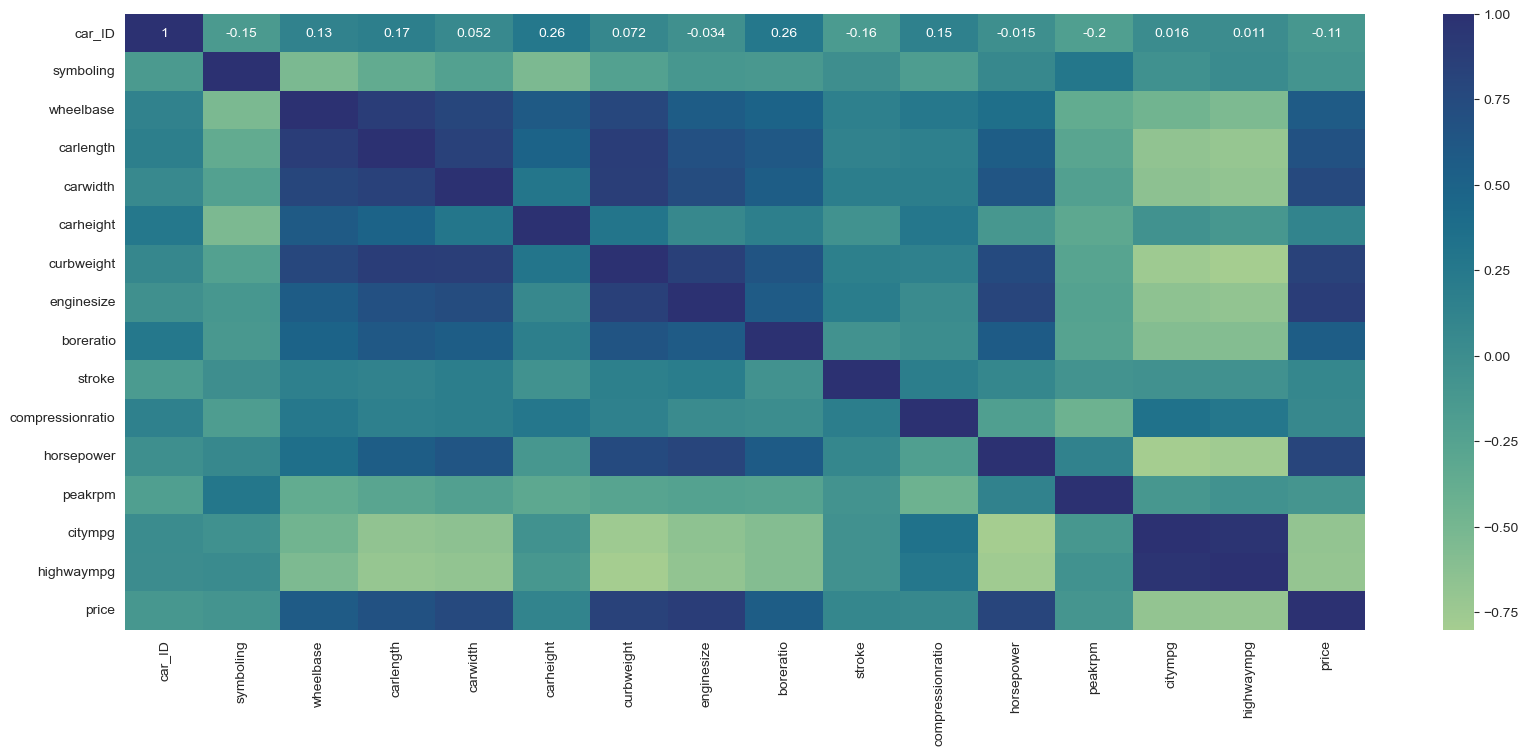

In [24]:
fig, ax = plt.subplots(figsize=(20,8))
sns.heatmap(cars_df[['car_ID','symboling','wheelbase','carlength','carwidth','carheight','curbweight'
                    ,'enginesize','boreratio','stroke',
                    'compressionratio','horsepower','peakrpm','citympg','highwaympg','price']].corr(), annot=True,
           cmap='crest')
plt.show()

#car width and car height could also be combined. (also, no matter how hard I tried idk why but the numbers did not
#appear for all the cells.)

In [25]:
cars_df['fueleconomy'] = (cars_df['citympg']+cars_df['highwaympg'])/2
cars_df.head()

#I think some of the variables that would have a significant effect while predicting the price are engine type,
#carbody, engine location, drive wheel etc. 

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company,fueleconomy
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,24.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,24.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,22.5
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,27.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,20.0


In [26]:
#1. part

cars_df = pd.get_dummies(cars_df, columns=['CarName','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation'
                                      ,'enginetype','cylindernumber','fuelsystem','car_company'])


In [27]:
#2nd part
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_cars = scaler.fit_transform(cars_df)
scaled_cars_df = pd.DataFrame(scaled_cars, columns=cars_df.columns)

#3rd part
from sklearn.model_selection import train_test_split
X = cars_df[['symboling','fueltype_gas','aspiration_turbo','doornumber_two','carbody_hardtop','carbody_sedan',
             'carbody_hatchback','carbody_wagon','drivewheel_rwd','drivewheel_fwd','enginelocation_rear',
            'wheelbase','carlength','carwidth','carheight','curbweight','enginetype_ohc','enginetype_ohcf',
             'enginetype_rotor','enginetype_l','enginetype_ohcv','enginetype_dohcv','cylindernumber_two',
             'cylindernumber_three','cylindernumber_four','cylindernumber_five','cylindernumber_six',
             'cylindernumber_twelve','enginesize','fuelsystem_idi','fuelsystem_mpfi','fuelsystem_4bbl',
            'fuelsystem_2bbl','fuelsystem_mfi','fuelsystem_spfi','fuelsystem_spdi',
             'boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg'
            ,'fueleconomy']]
y = cars_df[['price']]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


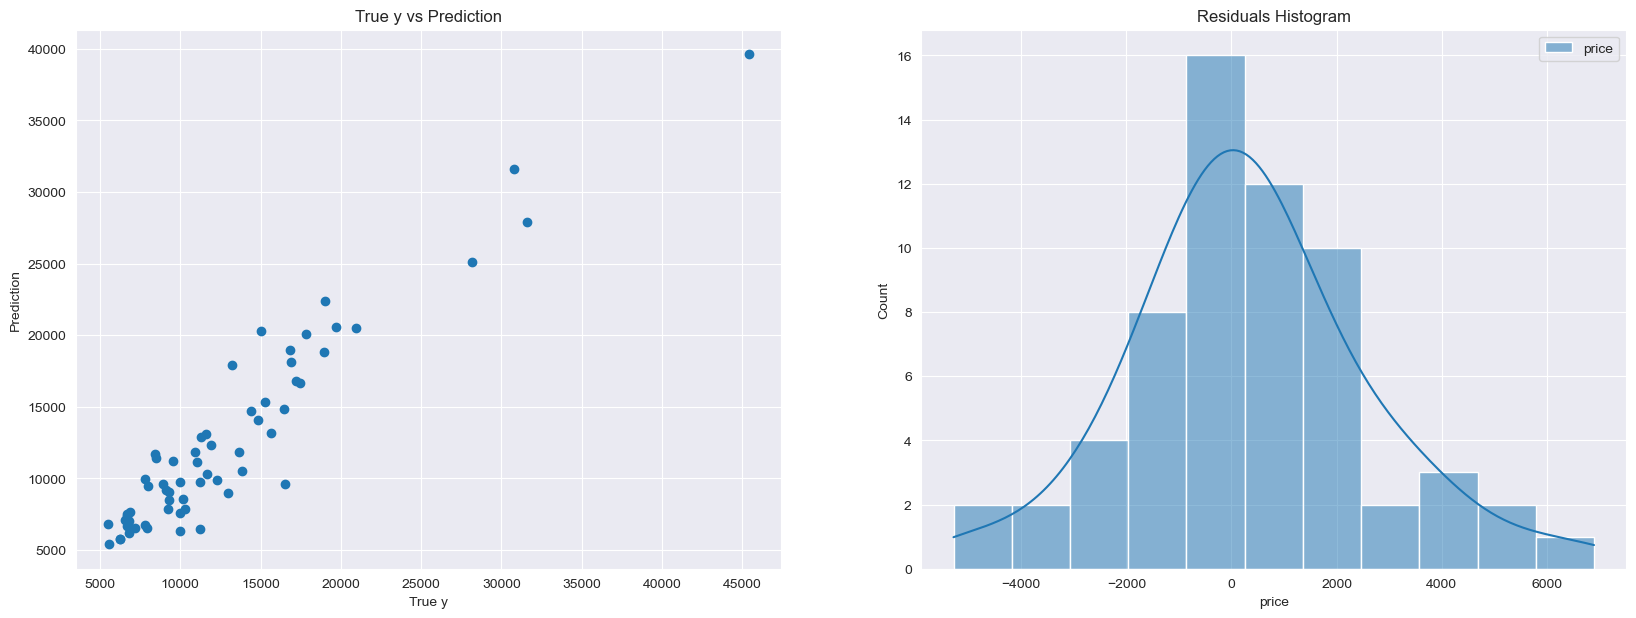

R-Squared: 0.8944467537697368


In [28]:
#training a model

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

predictions = lm.predict(X_test)

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(20,7))
axes[0].scatter(y_test,predictions)
axes[0].set_title('True y vs Prediction')
axes[0].set_xlabel('True y')
axes[0].set_ylabel('Prediction')

residuals = y_test - predictions

sns.histplot(residuals,kde=True, ax=axes[1])
axes[1].set_title('Residuals Histogram')
axes[1].set_xlabel('price')

plt.show()

from sklearn.metrics import r2_score 
print("R-Squared:", r2_score(y_test, predictions))

#the r-squared is pretty fair, it says that this is a good model.

In [29]:

coeff_cars = pd.DataFrame(lm.coef_.reshape(-1, 1), index=X.columns, columns=['Coeff'])

coeff_cars

#since there are a lot of variables, I will give a couple of examples. symboling, aspiration_turbo and drivewheel_
#rwd have positive correlation with the price; meaning, they are significant factors that affect the price. 
#on the other hand, fueltype has a negative correlation, meaning it doesn't affect the price much.

,Coeff
symboling,2.166664e+02
fueltype_gas,-6.203060e+03
aspiration_turbo,2.175358e+03
doornumber_two,4.962517e+02
carbody_hardtop,-4.309599e+03
carbody_sedan,-2.383058e+03
carbody_hatchback,-4.092666e+03
carbody_wagon,-3.629097e+03
drivewheel_rwd,2.513668e+01
drivewheel_fwd,-6.723712e+02
